In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importation des données

In [87]:
data = {
    f"data{i}": np.loadtxt(f"./data/data_tp{i}_app.txt") for i in range(1, 4)
}

valid_data = {
    f"data{i}": np.loadtxt(f"./data/data_tp{i}_dec.txt") for i in range(1, 4)
}

In [88]:
# image gif
description = {
    f"desc_tp{i}": plt.imread(f"./data/data_tp{i}_app.gif") for i in range(1, 4)
}


# Fonctions ou classes utiles

In [103]:

def validate(valid_data, predictor):
    
    x_valid, y_valid = valid_data[["x1", "x2"]].to_numpy(), valid_data.y.to_numpy()
    classes = np.unique(y_valid)

    y_pred = predictor(x_valid)
    valid_data["y_pred"] = y_pred
    erreurs = np.array(y_pred != y_valid).astype(int)
    erreurs = np.sum(erreurs)
    erreurs_percent = 100*erreurs/y_valid.size

    matrice_confusion = np.zeros((len(classes), len(classes)))
    matrice_confusion = pd.DataFrame(matrice_confusion)
    matrice_confusion.columns =  np.arange(len(classes))
    matrice_confusion.index = matrice_confusion.columns


    
    for classe1 in  range(len(classes)):
        for classe2 in  range(len(classes)):
            matrice_confusion.loc[classe1, classe2] = valid_data[(valid_data.y_pred == classe1+1) & (valid_data.y == classe2+1)].shape[0]

    # matrice_confusion.fillna(0, inplace=True)

    if len(classes) == 2:
        plt.figure()

        plt.text(.5, .8, f"erreurs : {erreurs}", fontsize=14, ha='center', va='center')
        plt.text(.5, .7, f"Pourcentage des erreurs : {erreurs_percent} %", fontsize=14, ha='center', va='center')
        plt.text(.5, .5, f"matrices de confusion :\n {matrice_confusion}", fontsize=14, ha='center', va='center')

        plt.axis('off')
        plt.show()

        plt.figure()
        
        plt.text(0, 0, f"vrai positive : {matrice_confusion.loc[0, 0]}", ha='center', fontsize=12, va='center', color='red')
        plt.text(1, 0, f"faux positive : {matrice_confusion.loc[0, 1]}", ha='center', fontsize=12,  va='center', color='red')
        plt.text(0, 1, f"faux negative : {matrice_confusion.loc[1, 0]}", ha='center', fontsize=12, va='center', color='red')
        plt.text(1, 1, f"vrai negative : {matrice_confusion.loc[1, 1]}", ha='center', fontsize=12, va='center', color='red')

        plt.axis("off")
        plt.imshow(matrice_confusion, cmap='YlGnBu', interpolation='nearest')
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        sns.heatmap(matrice_confusion, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
        plt.title('Heatmap')
        plt.xlabel('Columns')
        plt.ylabel('Rows')
        plt.show()


       
    print("erreurs :", erreurs)
    print(f"Pourcentage des erreurs : {erreurs_percent} %")
    print(f"matrices de confusion :\n {matrice_confusion}")
    return erreurs_percent, matrice_confusion

def show(df, save=True, title=None, delta =None):
    
    classes = df.y.unique()
    marker =  [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
    repartitons = {classe : df[df.y == classe] for classe in classes}
    
    plt.figure(figsize=(10, 8))
    
    for i, classe in enumerate(classes):
        card = repartitons[classe].size
        plt.scatter(repartitons[classe].x1, repartitons[classe].x2, marker=marker[i], alpha=.7, label=f"{str(classe)}, {card}")


    if title is not None:
        plt.title(title)

    if delta is not None:
        for deltai in delta:
            plt.axvline(deltai )
            plt.text(deltai, 2, f"{np.round(deltai)}")

    plt.axis("equal")
    plt.legend()

def plot_decision(x1_min, x1_max, x2_min, x2_max, prediction, sample = 300):
    """Uses Matplotlib to plot and fill a region with 2 colors
    corresponding to 2 classes, separated by a decision boundary

    Parameters
    ----------
    x1_min : float
        Minimum value for the first feature
    x1_max : float
        Maximum value for the first feature
    x2_min : float
        Minimum value for the second feature
    x2_max : float
        Maximum value for the second feature
    prediction :  (x : 2D vector) -> label : int
        Prediction function for decision
    sample : int, optional
        Number of samples on each feature (default is 300)
    """
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    y_grid_pred = [[prediction(np.array([x1,x2])) for x1 in x1_list] for x2 in x2_list] 
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=1,alpha=0.35)


def plot_decision_multi(x1_min, x1_max, x2_min, x2_max, prediction, sample = 300):
    """Uses Matplotlib to plot and fill a region with 2 colors
    corresponding to 2 classes.

    Parameters
    ----------
    x1_min : float
        Minimum value for the first feature
    x1_max : float
        Maximum value for the first feature
    x2_min : float
        Minimum value for the second feature
    x2_max : float
        Maximum value for the second feature
    prediction :  (x : 2D vector) -> label : int
        Prediction function for a vector x
    sample : int, optional
        Number of samples on each feature (default is 300)
    """
    x1_list = np.linspace(x1_min, x1_max, sample)
    x2_list = np.linspace(x2_min, x2_max, sample)
    y_grid_pred = [[prediction(np.array([[x1,x2]]))[0] for x1 in x1_list] for x2 in x2_list] 
    l = np.shape(np.unique(y_grid_pred))[0] - 1
    plt.contourf(x1_list, x2_list, y_grid_pred, levels=l, colors=plt.rcParams['axes.prop_cycle'].by_key()['color'], alpha=0.35)


# TP1 : Approche Bayessienne de la decision

In [90]:
data_tp1 = data["data1"]
valid_data_tp1 = valid_data["data1"]

y1_target = data_tp1[:, 0]
X1 =  data_tp1[:, 1:]

data_frame1 = pd.DataFrame(data_tp1, columns=["y", "x1", "x2"])
valid_data_frame1 = pd.DataFrame(valid_data_tp1, columns=["y", "x1", "x2"])

class 1.0 mean: [-6.10093065  5.99640958] count: 100
class 2.0 mean: [5.79953605 6.17117138] count: 100
class 3.0 mean: [ 5.7769986  -5.92582723] count: 100
class 4.0 mean: [-5.92499809 -6.01392348] count: 100
class 5.0 mean: [-0.01358148  0.25138977] count: 100


<Figure size 640x480 with 0 Axes>

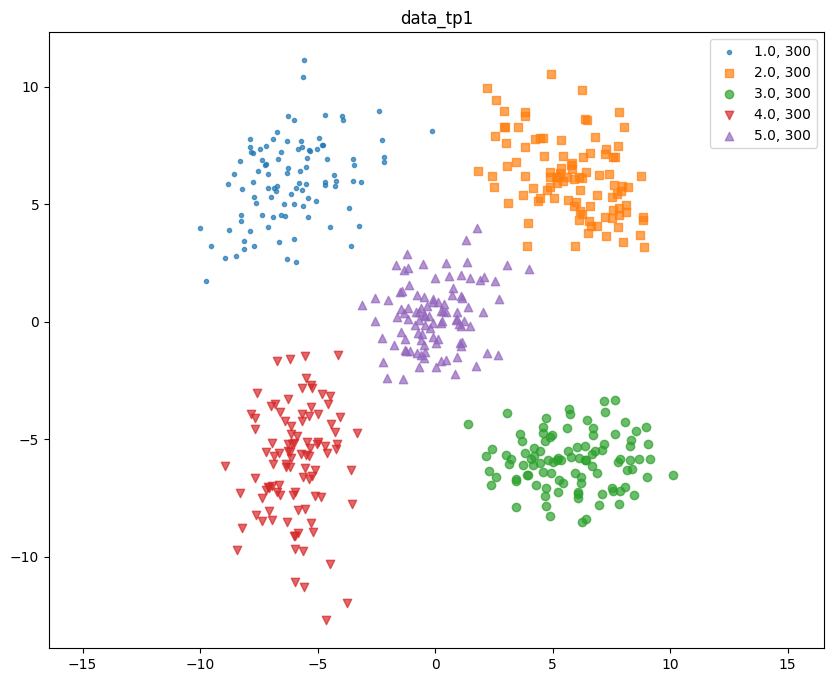

In [91]:
plt.figure()

classes = np.unique(y1_target)
# for classe in classes:
#     plt.scatter(X1[y1_target == classe, 0], X1[y1_target == classe, 1], label=f"class {classe}")

# plt.legend()

show(data_frame1, title="data_tp1")
for classe in classes:
   print(f"class {classe} mean: {X1[y1_target == classe].mean(axis=0)} count: {X1[y1_target == classe].shape[0]}")

## Estimation Gaussien

### Distance Euclidienne

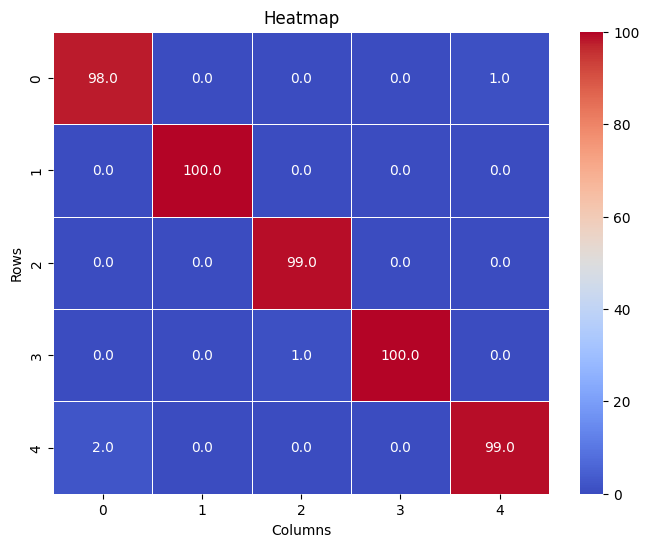

erreurs : 4
Pourcentage des erreurs : 0.8 %
matrices de confusion :
       0      1     2      3     4
0  98.0    0.0   0.0    0.0   1.0
1   0.0  100.0   0.0    0.0   0.0
2   0.0    0.0  99.0    0.0   0.0
3   0.0    0.0   1.0  100.0   0.0
4   2.0    0.0   0.0    0.0  99.0


(0.8,
       0      1     2      3     4
 0  98.0    0.0   0.0    0.0   1.0
 1   0.0  100.0   0.0    0.0   0.0
 2   0.0    0.0  99.0    0.0   0.0
 3   0.0    0.0   1.0  100.0   0.0
 4   2.0    0.0   0.0    0.0  99.0)

In [92]:
def fit(X, y):
    classes = np.unique(y)
    means = np.array([X[y == classe].mean(axis=0) for classe in classes])
    return means

def get_predictor(means):
    def predict(x):
        if len(x.shape) == 1:
            return np.argmin([np.linalg.norm(mean - x) for mean in means]) + 1
        return np.argmin([np.linalg.norm(mean - x, axis=1) for mean in means], axis=0)  + 1
    return predict

means = fit(X1, y1_target)
predictor = get_predictor(means)


y_pred = predictor(X1)


data_frame1["y_pred"] = y_pred


erreurs = np.array(y_pred != y1_target).astype(int)
erreurs = np.sum(erreurs)
erreurs_percent = 100*erreurs/y1_target.size

matrice_confusion = np.zeros((len(classes)-1, len(classes)-1))
matrice_confusion = pd.DataFrame(matrice_confusion)
matrice_confusion.columns =  np.arange(len(classes) -1)
matrice_confusion.index = matrice_confusion.columns



validate(valid_data_frame1, predictor)

In [93]:
np.array([0, 0]).shape

(2,)

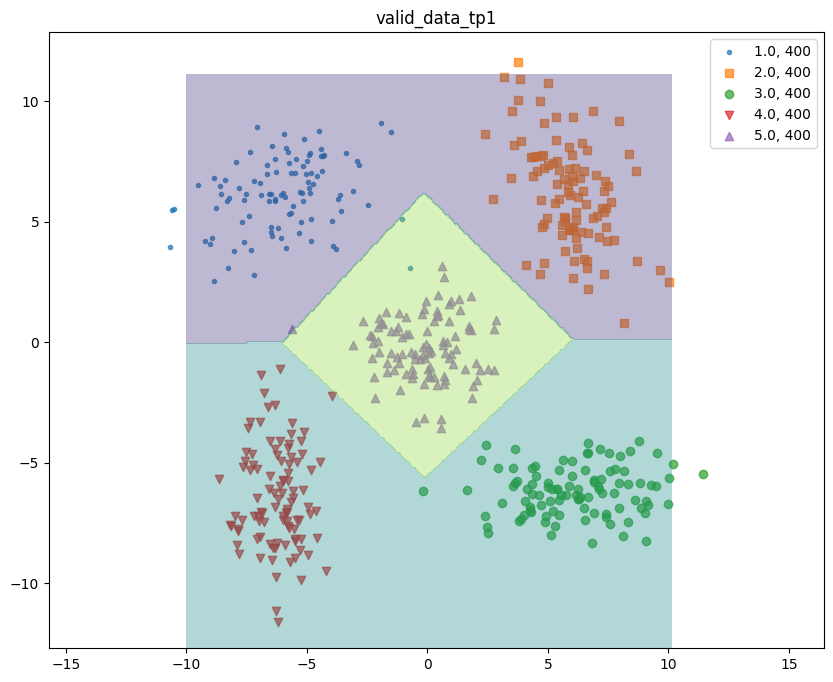

In [94]:
x1_min, x1_max = X1[:, 0].min(), X1[:, 0].max()
x2_min, x2_max = X1[:, 1].min(), X1[:, 1].max()

show(valid_data_frame1, title="valid_data_tp1")
plot_decision(x1_min, x1_max, x2_min, x2_max, predictor, sample=300)

## Distance de mahalanobis

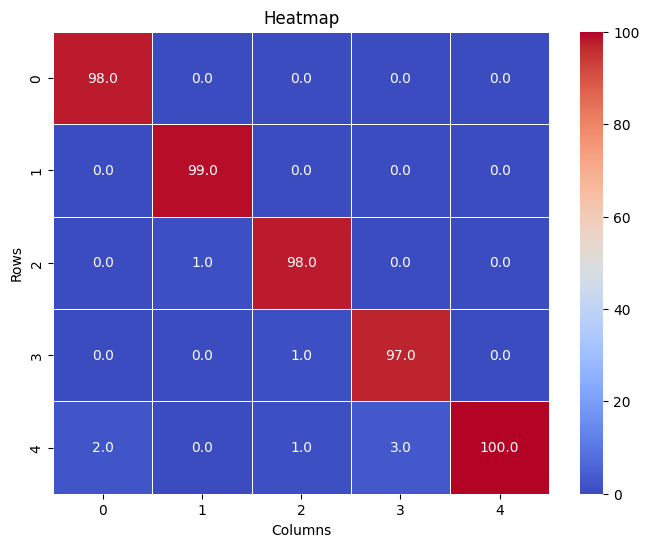

erreurs : 8
Pourcentage des erreurs : 1.6 %
matrices de confusion :
       0     1     2     3      4
0  98.0   0.0   0.0   0.0    0.0
1   0.0  99.0   0.0   0.0    0.0
2   0.0   1.0  98.0   0.0    0.0
3   0.0   0.0   1.0  97.0    0.0
4   2.0   0.0   1.0   3.0  100.0


(1.6,
       0     1     2     3      4
 0  98.0   0.0   0.0   0.0    0.0
 1   0.0  99.0   0.0   0.0    0.0
 2   0.0   1.0  98.0   0.0    0.0
 3   0.0   0.0   1.0  97.0    0.0
 4   2.0   0.0   1.0   3.0  100.0)

In [105]:
def fit(X, y):
    classes = np.unique(y)
    means = np.array([X[y == classe].mean(axis=0) for classe in classes])
    covs = np.array([np.cov(X[y == classe].T, rowvar=True) for classe in classes])
    return means, covs

mahalanobis_distance = lambda x, mean, cov: (x - mean) @ np.linalg.inv(cov) @ (x - mean).T


mahalanobis_distance = lambda x, y, sigma: np.sum((x@np.linalg.inv(sigma))*y, axis=1)
# mahalanobis_distance = lambda x, y, sigma : x @ np.linalg.inv(sigma) @ y

def get_predictor(means, covs):
    def predict(x):
        if len(x.shape) == 1:
            x = np.expand_dims(x, axis=0)
            return np.argmin([mahalanobis_distance(x-mean, x-mean, cov) for mean, cov in zip(means, covs)]) + 1
        return np.argmin([mahalanobis_distance(x-mean, x-mean, cov) for mean, cov in zip(means, covs)], axis=0) + 1
    return predict

def get_mal_predictor(means, covs, classes):
    sigma_inv = np.array([np.linalg.inv(sigma) for sigma in covs])
    classes = classes.astype(int) - 1
    def prediction(X):
        d = np.array(np.concatenate([[mahalanobis_distance(X-means[classe], X-means[classe], sigma_inv[classe]) ] for classe in classes])).T
        pred = d.argmin(axis=1)+1
        # if len(pred) == 1:
        #     return pred[0]
        return pred
    # def prediction(X):
    #     d = np.array(np.concatenate([[mahalanobis_distance(X-means[classe -1], X-means[classe-1]) ] for classe in classes])).T
    #     return d.argmin(axis=1)

    return prediction



means, covs = fit(X1, y1_target)
classes = np.unique(y1_target)
predictor = get_mal_predictor(means, covs, classes)



validate(valid_data_frame1, predictor)

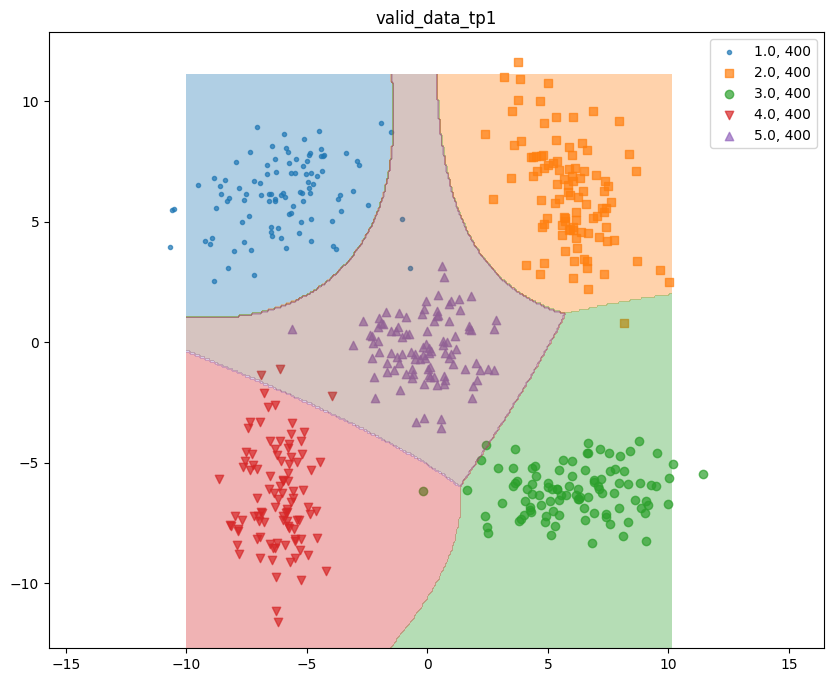

In [107]:
show(valid_data_frame1, title="valid_data_tp1")
plot_decision_multi(x1_min, x1_max, x2_min, x2_max, predictor, sample=300)

In [34]:
# add axis to an array
predictor(np.array([0, 0]))

5

## K plus proches voisins

## Parzen

## Séperation Lineaire

In [1]:
#n